In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [41]:
x = df.iloc[:,[3,4]].values
type(x)

numpy.ndarray

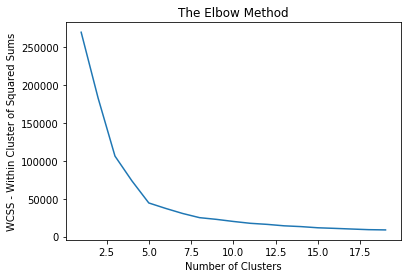

In [27]:
abc = []
for i in range(1,20):
    model = KMeans(n_clusters=i)
    model.fit(x)
    abc.append(model.inertia_)
plt.plot(range(1,20),abc)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Cluster of Squared Sums')
plt.show()

In [32]:
model = KMeans(n_clusters=5)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
y=model.predict(x)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [37]:
x[y==0,0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137],
      dtype=int64)

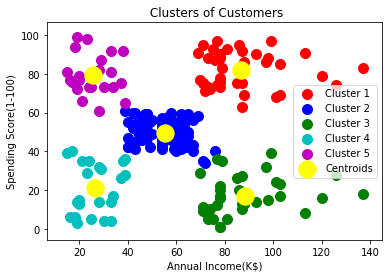

In [38]:
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='r',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=100,c='b',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=100,c='g',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=100,c='c',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=100,c='m',label='Cluster 5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=300, c='yellow',label='Centroids')
#anyways centroid not required
plt.title(' Clusters of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()